In [97]:
import pandas as pd

In [98]:
df = pd.read_csv('titanic_prepared_data.csv')

In [99]:
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,0,1,35.0,8.0500,0,0,1,0,0,1,1


# Separating Features and Labels

In [100]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values
print X.shape, y.shape

(891L, 10L) (891L, 1L)


# Splitting into Train and Test set

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print X_train.shape, y_train.shape

(623L, 10L) (623L, 1L)


# Classification and Accuracy

## Logistic Regression

Logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel()) #Trivia : What does ravel do?
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( accuracy_score(y_pred_log_reg, y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

80.22 %


In [103]:
print y_train.shape

(623L, 1L)


In [104]:
print y_train.ravel().shape

(623L,)


## Regularisation Constant

In [105]:
clf2 = LogisticRegression(C=0.08)
clf2.fit(X_train, y_train.ravel()) #Trivia : What does ravel do?
y_pred_log_reg2 = clf2.predict(X_test)
acc_log_reg2 = round( accuracy_score(y_pred_log_reg2, y_test) * 100, 2)
print (str(acc_log_reg2) + ' %')

81.34 %


# k -Nearest Neighbors

k-nearest neighbors algorithm (k-NN) is one of the simplest machine learning algorithms and is used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

 * In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k=1k=1, then the object is simply assigned to the class of that single nearest neighbor.
 * In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train.ravel())
y_pred_knn = clf.predict(X_test)
acc_knn = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
print (str(acc_knn) + ' percent')

68.28 percent


# Gaussian Naive Bayes

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Bayes' theorem (alternatively Bayes' law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes' theorem, a person's age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, y_train.ravel())
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
print (str(acc_gnb) + ' percent')

78.36 percent


# Decision Tree 

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.ravel())
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(accuracy_score(y_pred_decision_tree, y_test) * 100, 2)
print (str(acc_decision_tree) + ' percent')

76.12 percent


In [ ]:
# creating object of decision tree model with gain information criterion
#clf = DecisionTreeClassifier(criterion = 'gini', random_state=0,max_depth=3, min_samples_leaf=5)
# fit operation
#clf.fit(X_train, Y_train.ravel())
# prediction operation
#y_pred_dt = clf.predict(X_test)
# claculating accuracy
#acc_dt = round(accuracy_score(y_pred_dt, Y_test)*100, 2)
#print 'Accuracy by Decision tree classifier Model with entropy criterion is: '+ str(acc_dt)+' percent'
# creating object of decision tree model with entropy criterion
#clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state =0, max_depth=3, min_samples_leaf=5)
#clf_entropy.fit(X_train, Y_train.ravel())
#y_pred_dten = clf_entropy.predict(X_test)
#acc_dten = round(accuracy_score(y_pred_dten, Y_test)*100, 2)
#print 'Accuracy by Decision tree classifier Model with entropy criterion is: '+ str(acc_dten)+' percent'

# Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train.ravel())
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(accuracy_score(y_pred_random_forest, y_test) * 100, 2)
print (str(acc_random_forest) + ' percent')

82.46 percent


In [118]:
# Comparing Accuracy Value Of Decision Tree And Random Forest Algorithm
if acc_decision_tree > acc_random_forest:
    z = acc_decision_tree - acc_random_forest
    print 'Decision Tree Classifier gives more accurate result with accuracy of %s percent' % acc_decision_tree
    print '\nBy the accuracy difference of %s' %z
elif acc_decision_tree < acc_random_forest:
    z = acc_random_forest - acc_decision_tree
    print 'Random Forest Classifier gives more accurate result with accuracy of %s percent' % acc_random_forest
    print '\nBy the accuracy difference of %s' %z
else:
    print 'Decision Tree Classifier and Random Forest Classifier gives same accuracy of %s percent' % m

Random Forest Classifier gives more accurate result with accuracy of 82.46 percent

By the accuracy difference of 6.34


# Comparing Models 

In [123]:
# dictionary to plot bar graph
classifiers = {'Logistic Regression':acc_log_reg,
              'K Nearest Neghbour':acc_knn,
              'Gaussian Naive Bayes':acc_gnb,
              'Decision Tree':acc_decision_tree,
              'Random Forest':acc_random_forest}

In [124]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    
    'Score': [acc_log_reg, acc_knn,  acc_decision_tree, 
              acc_random_forest, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,82.46
0,Logistic Regression,80.22
4,Naive Bayes,78.36
2,Decision Tree,76.12
1,KNN,68.28


In [131]:
# ************************** DATA VISUALIZATION *********************************************************************************
# used for plotting graphs
import matplotlib.pyplot as plt 
# used to display graphs in ipython notebook only
%matplotlib inline
# ease the task of coding with matplotlib
import seaborn as sns
# initialization of seaborn's object
sns.set()

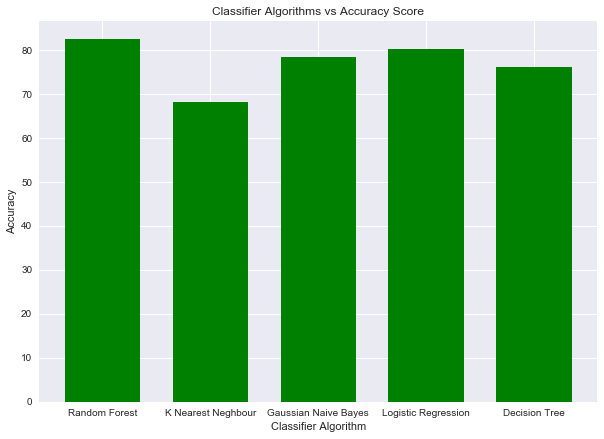

In [132]:
# ********************** PLOT USING MATPLOTLIB **********************************************************************************
# plot bar graph for differnt classification algorithms and their accuracy score
# set the layout of graph frame
plt.figure(figsize=(10, 7))
# set layout of bars
plt.bar(range(len(classifiers)), classifiers.values(),align='center', width=0.7, color = 'g')
# set labels at x axis
plt.xticks(range(len(classifiers)), classifiers.keys())
# gives name to x axis
plt.xlabel('Classifier Algorithm')
# gives name to y axis
plt.ylabel('Accuracy')
# gives title to the graph
plt.title('Classifier Algorithms vs Accuracy Score')
# prints the graph
plt.show()

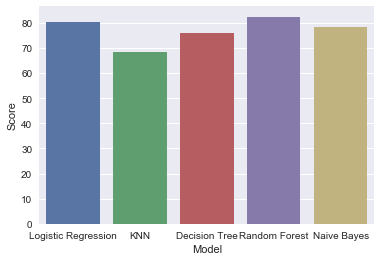

In [133]:
# ****************************** PLOT USING SEABORN *****************************************************************************
# Bar Graph for models and accuracy score
p = sns.barplot(x='Model',y='Score',data = models)
sns.despine()
